# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [12]:
path = "mefs/mefs_western_blot/mitochondria/"

# II] DL data

In [ ]:
# WRONG THEY ARE NOT BLOT 1 2 3 BUT NORM BAF AND FCCP

In [13]:
data = "_blot1", "_blot2", "_blot3"

dfs_normalized = []
for blot in data:

    file_n = "mitochondria" + blot + ".csv"
    df = pandas.read_csv(input_file_directory + path + file_n, sep = ";") #download
    print(df, '\n')
    df = df.T #transpose
    df.columns = df.loc['proteins'] #select head of columns
    df.columns.name = None #remove name of index column
    df = df.drop(df.index[0:2])
    #normalized columns
    df = df.assign(flag_actin = df['flag']/ df['actin'],
                   hsp60_actin= df['hsp60']/ df['actin'],
                   atpb_actin= df['atpb']/ df['actin']) 
    df = df.iloc[:,4:] #select normalized columns
    df.reset_index(inplace = True)

    dfs_normalized.append(df)
    
df_wbs = pandas.concat([dfs_normalized[0], dfs_normalized[1], dfs_normalized[2]], axis=0)
df_wbs

   blot proteins   ATG7-/-   ATG7(1)   ATG7(2)
0     1     flag   1972619  37804782  16789347
1     1    hsp60  11833296  29105317  13858175
2     1     atpb   2267548   4781548   2372891
3     1    actin  21777903  34006953  16076539 

   blot proteins   ATG7-/-   ATG7(1)   ATG7(2)
0     2     flag   3943569  36822489  15117125
1     2    hsp60  18803832  29538075   6309589
2     2     atpb   2677790   4118033   1476962
3     2    actin  25853125  35905610  13805418 

   blot proteins   ATG7-/-   ATG7(1)   ATG7(2)
0     3     flag   4888397  32315296  17000711
1     3    hsp60  21007004  29284832   9413468
2     3     atpb   2815548   3671376   1816527
3     3    actin  26895832  33795882  15567882 



,index,flag_actin,hsp60_actin,atpb_actin
0,ATG7-/-,0.0905789,0.543363,0.104122
1,ATG7(1),1.11168,0.855864,0.140605
2,ATG7(2),1.04434,0.862012,0.1476
0,ATG7-/-,0.152537,0.727333,0.103577
1,ATG7(1),1.02554,0.822659,0.114691
2,ATG7(2),1.09501,0.457037,0.106984
0,ATG7-/-,0.181753,0.781051,0.104683
1,ATG7(1),0.95619,0.866521,0.108634
2,ATG7(2),1.09204,0.604672,0.116684


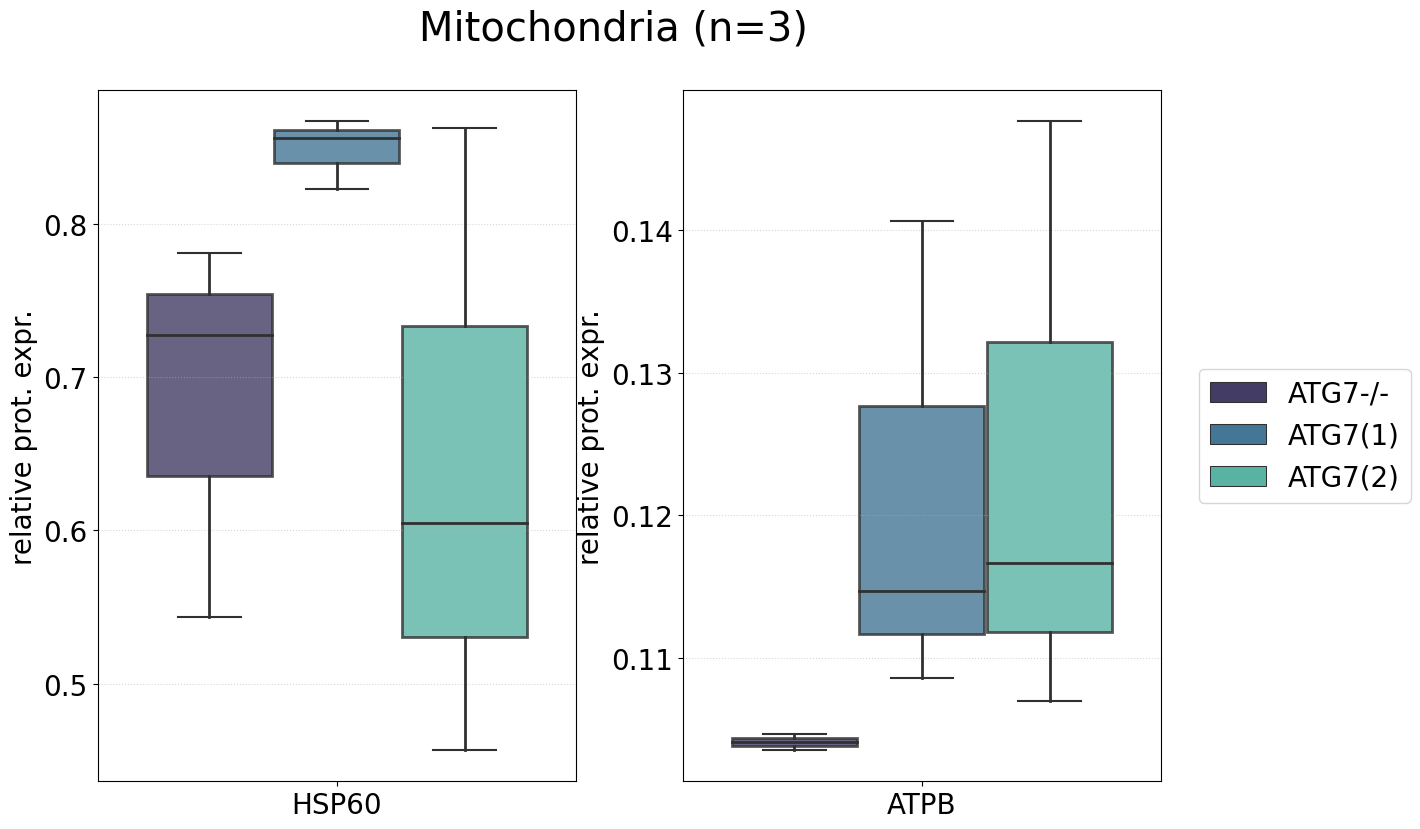

In [37]:
# Distribution: Data preparation + graph
df = df_wbs[['index','hsp60_actin', 'atpb_actin']]
df = df.rename(columns = {'flag_actin':'Flag','hsp60_actin':'HSP60','atpb_actin':'ATPB'})

#Figure with 2 graphs
fig, ax = plt.subplots(1,2)
plt.tight_layout()
fig.suptitle('Mitochondria (n=3)', y=1.05, fontsize="x-large")
## Figure 1: HSP60
df1 = df[['index','HSP60']]
df1 = df1.melt(id_vars=["index"], var_name="proteins")

fig = seaborn.boxplot(ax=ax[0], x="proteins", y="value", hue="index", palette = 'mako',
                data = df1, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

fig.set_ylabel('relative prot. expr.')
fig.set_xlabel('')
fig.get_legend().remove()

## Figure 2: ATPB
df2 = df[['index','ATPB']]
df2 = df2.melt(id_vars=["index"], var_name="proteins")

seaborn.boxplot(ax=ax[1], x="proteins", y="value", hue="index", palette = 'mako',
                data = df2, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.ylabel('relative prot. expr.')
plt.xlabel('')
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

# #save
# path = 'ATG7/MEF/Western_blot/'
# plt.savefig(output_file_directory+path+'ATG7_mitochondria.svg')

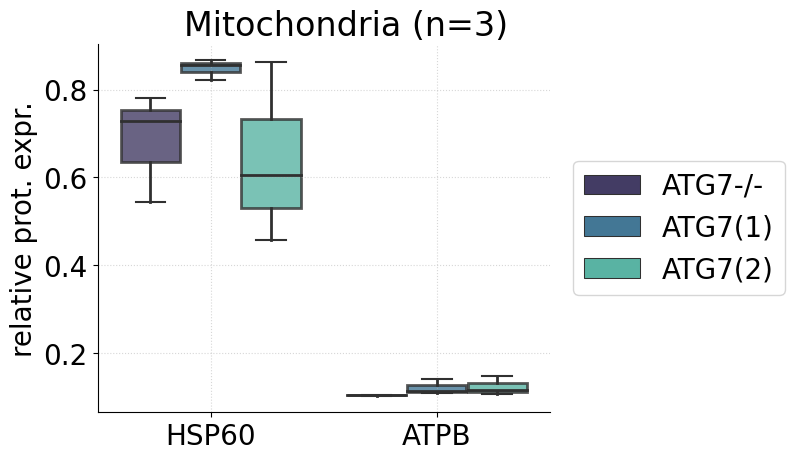

In [38]:
# Distribution: Data preparation + graph
#from wide to long dataframe

df = df_wbs[['index','hsp60_actin', 'atpb_actin']]
df = df.rename(columns = {'flag_actin':'Flag','hsp60_actin':'HSP60','atpb_actin':'ATPB'})
df = df.melt(id_vars=["index"], var_name="proteins")

#graph
seaborn.catplot(x="proteins", y="value", hue="index", aspect= 1.2, kind="box", palette = 'mako',
                data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False, legend=False)

plt.tight_layout()
plt.grid(alpha = 0.5, ls=':')
plt.ylabel('relative prot. expr.')
plt.xlabel('')
plt.title('Mitochondria (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

#save
path = 'ATG7/MEF/Western_blot/'
plt.savefig(output_file_directory+path+'ATG7_mitochondria.svg')

In [16]:
#Statistics T-test for the means of two independent samples
proteins = 'flag_actin', 'hsp60_actin', 'atpb_actin'

df_stats = df_wbs.sort_values(['index'], ascending = True)
df_stats.reset_index(drop=True, inplace=True)

df_ev = df_stats.iloc[6:, :]
df_iso1 = df_stats.iloc[0:3, :]
df_iso2 = df_stats.iloc[3:6, :]

control_label = df_stats.iloc[6]['index']
iso1_label = df_stats.loc[0]['index']
iso2_label = df_stats.loc[3]['index']

for protein in proteins:
    print(protein.upper())
    ## ATG7(1) vs EV
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_ev[protein])
    print("the pvalue between", iso1_label, "and", control_label,"is", "{:.5E}".format(pvalue))
    ## ATG(2) vs EV
    statistic, pvalue = scipy.stats.ttest_ind(df_iso2[protein], df_ev[protein])
    print("the pvalue between", iso2_label, "and", control_label,"is", "{:.5E}".format(pvalue))
      ## ATG7(1) vs ATG7(2)
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_iso2[protein])
    print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))   
    print('\n')

FLAG_ACTIN
the pvalue between ATG7(1) and ATG7-/- is 7.05773E-05
the pvalue between ATG7(2) and ATG7-/- is 7.65190E-06
the pvalue between ATG7(1) and ATG7(2) is 3.91098E-01


HSP60_ACTIN
the pvalue between ATG7(1) and ATG7-/- is 8.79076E-02
the pvalue between ATG7(2) and ATG7-/- is 7.73360E-01
the pvalue between ATG7(1) and ATG7(2) is 1.56932E-01


ATPB_ACTIN
the pvalue between ATG7(1) and ATG7-/- is 1.54739E-01
the pvalue between ATG7(2) and ATG7-/- is 1.84350E-01
the pvalue between ATG7(1) and ATG7(2) is 8.83638E-01




In [8]:
df_stats

,index,flag_actin,hsp60_actin,atpb_actin
0,ATG7(1),1.11168,0.855864,0.140605
1,ATG7(1),1.02554,0.822659,0.114691
2,ATG7(1),0.95619,0.866521,0.108634
3,ATG7(2),1.04434,0.862012,0.1476
4,ATG7(2),1.09501,0.457037,0.106984
5,ATG7(2),1.09204,0.604672,0.116684
6,ATG7-/-,0.0905789,0.543363,0.104122
7,ATG7-/-,0.152537,0.727333,0.103577
8,ATG7-/-,0.181753,0.781051,0.104683
